In [16]:
from API import DualizationDatasetAPI
import pandas as pd

---------
## Chapter 1. Three Repetitions of the same drum pattern dualized at random times
---------
###  Chapter 1.A. 24 Sample Subset Each Dualized Using All Four Participants

#####  The folder containing the midi information is structured as follows:

```
    Directory: e.g.midi_files
    |
    |
    |-----Repetitions (three repetitions of the same drum pattern dualized at random times)
               |
               |--------------tested_with_four_participants
                                 |-----------------------[001 P1P2P3P4] drummer* --> (13 files)
                                 |                                 |------- original.mid --> (drum pattern used for dualization)
                                 |                                 |------- Participant_X_repetition_Y.mid --> (dualization of the original.mid)
                                ...
                                 |
                                 |-----------------------[001 P1P2P3P4] drummer*



In [17]:
# load the dataset
FullDualizationDataset = DualizationDatasetAPI(midi_folder="midi_files")


# confusion Matrix for the 24 sample subset
ThreeRepConfusion = pd.DataFrame()

Found 345 tested patterns


In [18]:
# get the subset of the dataset where the three repetitions were dualized using all four participants
ThreeRepFourPsDataset = FullDualizationDataset.ThreeRepetitionSubset.MultipleParticipantSubset
print(ThreeRepFourPsDataset)

------------------------------------------------------------
Number of Drum Patterns Dualized --> 24
fields available: Index(['Test Number', 'Was Tested On P1', 'Was Tested On P2',
       'Was Tested On P3', 'Was Tested On P4',
       'Was Tested On Multiple Participants', 'Test Type', 'Style', 'Tempo',
       'GMD Drummer', 'GMD Performance Session', 'GMD Segment Type',
       'GMD Segment Meter', 'Selected 2Bars From Start',
       'Dualized Midifolder Path', 'Test Folder'],
      dtype='object')
------------------------------------------------------------


#### Chapter 1.A Step Densities


Step densities are calculated by dividing the number of onsets in a dualization by the number of steps in the 2bar pattern (relative to two bars of 16th note grids in 4-4, totalling 32 steps).

In [19]:
non_normalized_step_densities_ThreeRepFourPsDataset = ThreeRepFourPsDataset.collect_step_densities()
normalized_step_densities_ThreeRepFourPsDataset = ThreeRepFourPsDataset.collect_step_densities(normalize_by_original=True)

In [20]:
non_normalized_intra_edits_ThreeRepFourPsDataset = ThreeRepFourPsDataset.calculate_intra_dualization_edit_distances()
intra_jaccard_similarities_ThreeRepFourPsDataset = ThreeRepFourPsDataset.calculate_intra_dualization_jaccard_similarities()


# get random pair edits
random_rep_pairs = ThreeRepFourPsDataset.get_n_random_dualization_pairs_from_three_repetitions(
    len(list(non_normalized_intra_edits_ThreeRepFourPsDataset.values())[0])
)

non_normalized_intra_edits_ThreeRepFourPsDataset.update({
    "Random": ThreeRepFourPsDataset.extract_inter_edit_distances_from_list_of_pattern_pairs(random_rep_pairs, normalize_by_union=False),
})

intra_jaccard_similarities_ThreeRepFourPsDataset.update({
    "Random ": ThreeRepFourPsDataset.extract_inter_jaccard_similarities_from_list_of_pattern_pairs(random_rep_pairs),
})

-----

#### Chapter 1.B Edit Distance and Jaccard Similarity between the original and the dualizations


#### Intra Participant Analysis
In these tests, we compare the three dualizations for EACH participant to the the other two dualizations for that same participant.

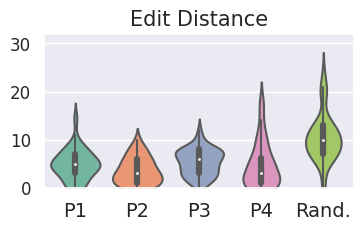

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = non_normalized_intra_edits_ThreeRepFourPsDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace("Random", "Rand."), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set2")
# change figure dimensions
plt.gcf().set_size_inches(3, 3)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("", fontsize=12)
# change axis limits
plt.gcf().set_size_inches(4, 2)
# change axis label font size
plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.ylim(0, 32)
plt.title("Edit Distance", fontsize=15)

plt.show()

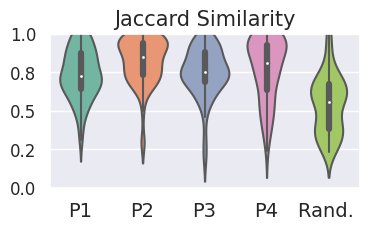

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = intra_jaccard_similarities_ThreeRepFourPsDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace("Random", "Rand."), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set2")
# change figure dimensions
plt.gcf().set_size_inches(4, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("", fontsize=12)
# change axis limits
plt.ylim(0, 1)
# change axis label font size#
# yfont smaller
plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=12)


plt.title("Jaccard Similarity", fontsize=15)

# change font to Times New Roman

# format y values to single decimal
from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.show()

#### Inter Participant Analysis
In these tests, we compare a dualization for one participant to all of the dualizations of the other three participants.


In [23]:
inter_edits_ThreeRepFourPsDataset = ThreeRepFourPsDataset.calculate_inter_dualization_edit_distances(normalize_by_union=False)
inter_jaccard_similarities_ThreeRepFourPsDataset = ThreeRepFourPsDataset.calculate_inter_dualization_jaccard_similarities()

# get random pair edits
rep_pairs = ThreeRepFourPsDataset.get_n_random_dualization_pairs_from_three_repetitions(
    len(list(inter_edits_ThreeRepFourPsDataset.values())[0])
)
inter_edits_ThreeRepFourPsDataset.update({
    "Rand.": ThreeRepFourPsDataset.extract_inter_edit_distances_from_list_of_pattern_pairs(rep_pairs, normalize_by_union=False)
})
inter_jaccard_similarities_ThreeRepFourPsDataset.update({
    "Rand.": ThreeRepFourPsDataset.extract_inter_jaccard_similarities_from_list_of_pattern_pairs(rep_pairs)
})

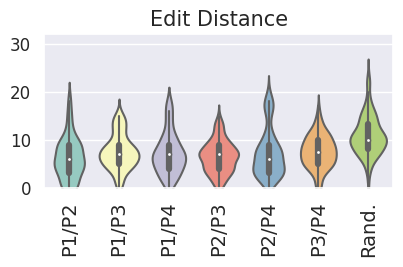

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = inter_edits_ThreeRepFourPsDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace(" vs. ", "/"), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set3")
# change figure dimensions
plt.gcf().set_size_inches(4.5, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.ylim(0, 32)


plt.title("Edit Distance", fontsize=15)

# change font to Times New Roman

# format y values to single decimal
from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# rotate x labels
plt.xticks(rotation=90)

plt.show()

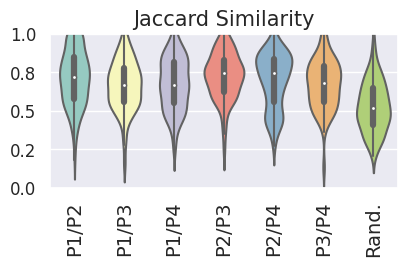

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = inter_jaccard_similarities_ThreeRepFourPsDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace(" vs. ", "/"), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set3")
# change figure dimensions
plt.gcf().set_size_inches(4.5, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.ylim(0, 1)


plt.title("Jaccard Similarity", fontsize=15)

# change font to Times New Roman

# format y values to single decimal
from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# rotate x labels
plt.xticks(rotation=90)

plt.show()

---------
## Chapter 2. Simple Vs Complex Repetitions
---------
###  Chapter2.A. 24 Sample Subset Each Dualized Using All Four Participants

#####  The folder containing the midi information is structured as follows:

```
    Directory: e.g.midi_files
    |
    |
    |-----Repetitions (three repetitions of the same drum pattern dualized at random times)
               |
               |--------------tested_with_four_participants
                                 |-----------------------[001 P1P2P3P4] drummer* --> (13 files)
                                 |                                 |------- original.mid --> (drum pattern used for dualization)
                                 |                                 |------- Participant_X_repetition_Y.mid --> (dualization of the original.mid)
                                ...
                                 |
                                 |-----------------------[001 P1P2P3P4] drummer*



In [26]:
# load the dataset
FullDualizationDataset = DualizationDatasetAPI(midi_folder="midi_files")

Found 345 tested patterns


In [27]:
# get the subset of the dataset where the simple and complex repetitions were dualized using all participants 1 and 2
SimpleVsComplexDataset = FullDualizationDataset.SimpleComplexSubset
print(SimpleVsComplexDataset)

------------------------------------------------------------
Number of Drum Patterns Dualized --> 273
fields available: Index(['Test Number', 'Was Tested On P1', 'Was Tested On P2',
       'Was Tested On P3', 'Was Tested On P4',
       'Was Tested On Multiple Participants', 'Test Type', 'Style', 'Tempo',
       'GMD Drummer', 'GMD Performance Session', 'GMD Segment Type',
       'GMD Segment Meter', 'Selected 2Bars From Start',
       'Dualized Midifolder Path', 'Test Folder'],
      dtype='object')
------------------------------------------------------------


#### Chapter 2.A Step Densities


Step densities are calculated by dividing the number of onsets in a dualization by the number of steps in the 2bar pattern (relative to two bars of 16th note grids in 4-4, totalling 32 steps).

In [28]:
step_densities_SimpleVsComplexDataset = SimpleVsComplexDataset.collect_step_densities()

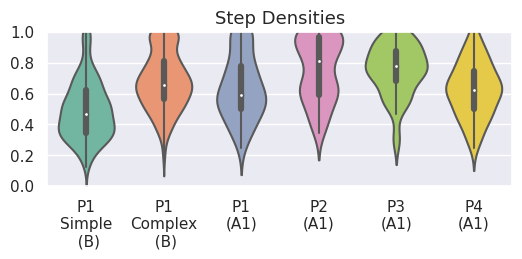

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = {}
data_dict.update(step_densities_SimpleVsComplexDataset)
rm_ = []
for key in data_dict.keys():
    if "Participant 2" in key:
        rm_.append(key)
data_dict.pop(rm_[0])
data_dict.pop(rm_[1])

data_dict.update(non_normalized_step_densities_ThreeRepFourPsDataset)

keys= list(data_dict.keys())

for key in keys[2:]:
    # rename
    data_dict.update({
        key.replace("Participant 1", "P1 (A1)").replace("Participant 2", "P2 (A1)").replace("Participant 3", "P3 (A1)" ).replace("Participant 4", "P4 (A1)").replace(" vs. ", "/").replace("Simple", "Simple\n  (B) ").replace("Complex", "Complex\n  (B) "): data_dict.pop(key)
    })
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace(" vs. ", "/").replace(" ", "\n").replace("Simple", "Simple\n  (B) ").replace("Complex", "Complex\n  (B) "), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set2")
# change figure dimensions
plt.gcf().set_size_inches(6, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("", fontsize=12)
# change axis limits
plt.ylim(0, 1)
# change axis label font size
plt.tick_params(axis='both', which='major', labelsize=11)

plt.title("Step Densities", fontsize=13)
# rotate x labels
plt.xticks(rotation=0)
plt.show()

#### Intra Participant Analysis
In these tests, we compare a participant's simple dualization with the same participant's complex dualization.


In [31]:
intra_edits_SimpleVsComplexDataset = SimpleVsComplexDataset.MultipleParticipantSubset.calculate_intra_dualization_edit_distances(normalize_by_union=False)
intra_jaccard_similarities_SimpleVsComplexDataset = SimpleVsComplexDataset.MultipleParticipantSubset.calculate_intra_dualization_jaccard_similarities()

# get random pair edits
random_rep_pairs_simple = SimpleVsComplexDataset.MultipleParticipantSubset.get_n_random_simplecomplex_pairs_from_simple_complex(
    len(list(non_normalized_intra_edits_ThreeRepFourPsDataset.values())[0])
)
# get random pair edits
random_rep_pairs_complex = SimpleVsComplexDataset.MultipleParticipantSubset.get_n_random_complex_pairs_from_simple_complex(
    len(list(non_normalized_intra_edits_ThreeRepFourPsDataset.values())[0])
)
intra_edits_SimpleVsComplexDataset.update({
    "Rand. Sim. vs. Rand. Compl.": SimpleVsComplexDataset.extract_inter_edit_distances_from_list_of_pattern_pairs(random_rep_pairs_simple, normalize_by_union=False),
})
intra_jaccard_similarities_SimpleVsComplexDataset.update({
    "Rand. Sim. vs. Rand. Compl.": SimpleVsComplexDataset.extract_inter_jaccard_similarities_from_list_of_pattern_pairs(random_rep_pairs_simple),
})




# intra_jaccard_similarities_SimpleVsComplexDataset.update({
#     "Rand.": ThreeRepFourPsDataset.extract_inter_jaccard_similarities_from_list_of_pattern_pairs(rep_pairs)
# })

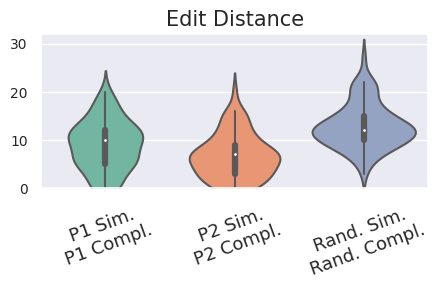

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = intra_edits_SimpleVsComplexDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace(" vs. ", "\n").replace("Simple", "Sim.").replace("Complex", "Compl."), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set2")
# change figure dimensions
plt.gcf().set_size_inches(5, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("", fontsize=15)
# change axis limits
plt.ylim(0, 32)
# change axis label font size
plt.tick_params(axis='x', which='major', labelsize=13)
plt.tick_params(axis='y', which='major', labelsize=10)


plt.title("Edit Distance", fontsize=15)
# rotate x axis labels
plt.xticks(rotation=20)
plt.show()

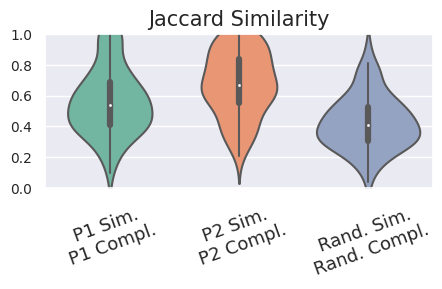

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = intra_jaccard_similarities_SimpleVsComplexDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace(" vs. ", "\n").replace("Simple", "Sim.").replace("Complex", "Compl."), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set2")
# change figure dimensions
plt.gcf().set_size_inches(5, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("", fontsize=12)
# change axis limits
plt.ylim(0, 1)
# change axis label font size
plt.tick_params(axis='x', which='major', labelsize=13)
plt.tick_params(axis='y', which='major', labelsize=10)

plt.title("Jaccard Similarity", fontsize=15)
# rotate x axis labels
plt.xticks(rotation=20)
plt.show()

#### Inter Participant Analysis
In these tests, we compare a participant's simple dualization with the other participants' simple  dualizations. Likewise, we compare a participant's complex dualization with the other participants' complex dualizations.

In [36]:
inter_edits_SimpleVsComplexDataset = SimpleVsComplexDataset.MultipleParticipantSubset.calculate_inter_dualization_edit_distances(normalize_by_union=False)
inter_jaccard_similarities_SimpleVsComplexDataset = SimpleVsComplexDataset.MultipleParticipantSubset.calculate_inter_dualization_jaccard_similarities()
# get random pair edits
random_rep_pairs_simple = SimpleVsComplexDataset.MultipleParticipantSubset.get_n_random_simple_pairs_from_simple_complex(
    len(list(non_normalized_intra_edits_ThreeRepFourPsDataset.values())[0])
)
# get random pair edits
random_rep_pairs_complex = SimpleVsComplexDataset.MultipleParticipantSubset.get_n_random_complex_pairs_from_simple_complex(
    len(list(non_normalized_intra_edits_ThreeRepFourPsDataset.values())[0])
)

inter_edits_SimpleVsComplexDataset.update({
    "Rand. Sim. vs. Rand. Sim.": SimpleVsComplexDataset.extract_inter_edit_distances_from_list_of_pattern_pairs(random_rep_pairs_simple),
    "Rand. Compl. vs. Rand. Compl.": SimpleVsComplexDataset.extract_inter_edit_distances_from_list_of_pattern_pairs(random_rep_pairs_complex)

})

inter_jaccard_similarities_SimpleVsComplexDataset.update({
    "Rand. Sim. vs. Rand. Sim.": SimpleVsComplexDataset.extract_inter_jaccard_similarities_from_list_of_pattern_pairs(random_rep_pairs_simple),
    "Rand. Compl. vs. Rand. Compl.": SimpleVsComplexDataset.extract_inter_jaccard_similarities_from_list_of_pattern_pairs(random_rep_pairs_complex)
})


keys = list(inter_edits_SimpleVsComplexDataset.keys())
inter_edits_SimpleVsComplexDataset = {
    keys[0]: inter_edits_SimpleVsComplexDataset[keys[0]],
    keys[2]: inter_edits_SimpleVsComplexDataset[keys[2]],
    keys[1]: inter_edits_SimpleVsComplexDataset[keys[1]],
    keys[3]: inter_edits_SimpleVsComplexDataset[keys[3]],

}

keys = list(inter_jaccard_similarities_SimpleVsComplexDataset.keys())
inter_jaccard_similarities_SimpleVsComplexDataset = {
    keys[0]: inter_jaccard_similarities_SimpleVsComplexDataset[keys[0]],
    keys[2]: inter_jaccard_similarities_SimpleVsComplexDataset[keys[2]],
    keys[1]: inter_jaccard_similarities_SimpleVsComplexDataset[keys[1]],
    keys[3]: inter_jaccard_similarities_SimpleVsComplexDataset[keys[3]],

}



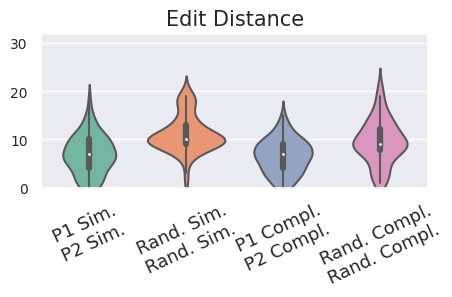

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = inter_edits_SimpleVsComplexDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace(" vs. ", "\n").replace("Simple", "Sim.").replace("Complex", "Compl."), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set2")
# change figure dimensions
plt.gcf().set_size_inches(5, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("", fontsize=15)
# change axis limits
plt.ylim(0, 32)
# change axis label font size
plt.tick_params(axis='x', which='major', labelsize=13)
plt.tick_params(axis='y', which='major', labelsize=10)


plt.title("Edit Distance", fontsize=15)
# rotate x axis labels
plt.xticks(rotation=25)
plt.show()

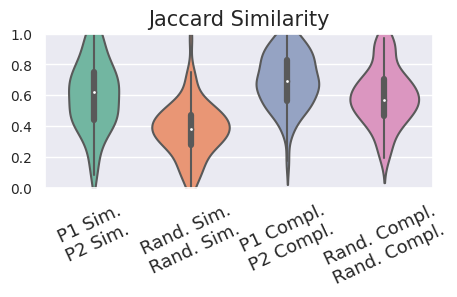

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

data_dict = inter_jaccard_similarities_SimpleVsComplexDataset
Groups = []
Category = []
Values = []
df = pd.DataFrame()
for P, values in data_dict.items():
    df = df.append(pd.DataFrame({"Identifier": P.replace("Participant ", "P").replace(" vs. ", "\n").replace("Simple", "Sim.").replace("Complex", "Compl.").replace(" vs.", "\n"), "Values": values}))


# Use a color palette
sns.violinplot(x=df["Identifier"], y=df["Values"], palette="Set2")
# change figure dimensions
plt.gcf().set_size_inches(5, 2)

# CHANGE FONT SIZE
plt.rcParams.update({'font.size': 2})
plt.xlabel("")
plt.ylabel("", fontsize=12)
# change axis limits
plt.ylim(0, 1)
# change axis label font size
plt.tick_params(axis='x', which='major', labelsize=13)
plt.tick_params(axis='y', which='major', labelsize=10)

plt.title("Jaccard Similarity", fontsize=15)
# rotate x axis labels
plt.xticks(rotation=25)
plt.show()